In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
# (a) Load the given dataset.

data = pd.read_csv('adult.data')
data.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [3]:
attribute_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 
                   'marital-status', 'occupation', 'relationship', 'race', 'sex', 
                   'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 
                   'income'] #using the data definition from the UCI website

data.columns = attribute_names

print(data.head())


   age          workclass  fnlwgt   education  education-num   
0   50   Self-emp-not-inc   83311   Bachelors             13  \
1   38            Private  215646     HS-grad              9   
2   53            Private  234721        11th              7   
3   28            Private  338409   Bachelors             13   
4   37            Private  284582     Masters             14   

        marital-status          occupation    relationship    race      sex   
0   Married-civ-spouse     Exec-managerial         Husband   White     Male  \
1             Divorced   Handlers-cleaners   Not-in-family   White     Male   
2   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
3   Married-civ-spouse      Prof-specialty            Wife   Black   Female   
4   Married-civ-spouse     Exec-managerial            Wife   White   Female   

   capital-gain  capital-loss  hours-per-week  native-country  income  
0             0             0              13   United-States   <=50

In [4]:
# (b) Exhibit the initial few rows of the dataset. Show the count of instances and descriptive features in
# the original data.

num_instances, num_features = data.shape
print("\nNumber of instances:", num_instances)
print("Number of descriptive features:", num_features)


Number of instances: 32560
Number of descriptive features: 15


In [16]:
# (c) The Adult dataset represents missing values with . Show the count of missing values per each feature.

missing_values = {}

for attr in attribute_names:
    instance = data[attr]  
    count = 0
    for val in instance:
        
        if val == " ?":  #adding space before question mark as all the values have a space before them. 
            count += 1
    missing_values[attr] = count
    
print(missing_values)

{'age': 0, 'workclass': 1836, 'fnlwgt': 0, 'education': 0, 'education-num': 0, 'marital-status': 0, 'occupation': 1843, 'relationship': 0, 'race': 0, 'sex': 0, 'capital-gain': 0, 'capital-loss': 0, 'hours-per-week': 0, 'native-country': 583, 'income': 0}


In [20]:
# (d) Eliminate instances containing missing values. Subsequently, display the updated instance count.

# Replace '?' with NaN
data.replace(' ?', np.nan, inplace=True) #adding space before question mark as all the values have a space before them.

# Drop rows with missing values
data.dropna(inplace=True)

# Display the updated instance count
updated_instance_count = len(data)
print("Updated instance count after removing rows with missing values:", updated_instance_count)

Updated instance count after removing rows with missing values: 30161


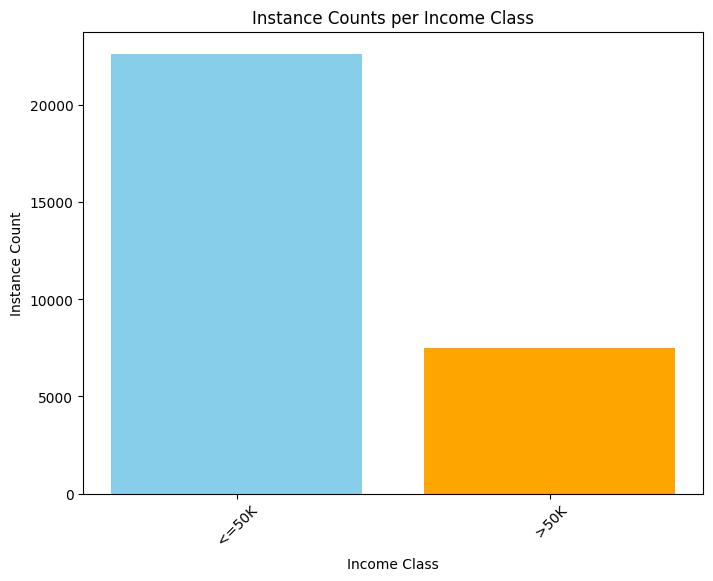

In [21]:
# (e) Illustrate a histogram representing instance counts per INCOME class.

income_counts = data['income'].value_counts()

# Plot the histogram
plt.figure(figsize=(8, 6))
plt.bar(income_counts.index, income_counts.values, color=['skyblue', 'orange'])
plt.xlabel('Income Class')
plt.ylabel('Instance Count')
plt.title('Instance Counts per Income Class')
plt.xticks(range(len(income_counts)), income_counts.index, rotation=45)
plt.show()


In [22]:
# (f)The class feature, INCOME, comprises two categorical values: Transform
# this feature into binary 0/1

data['income'] = data['income'].map({' <=50K': 0, ' >50K': 1})

# Display the first few rows to verify the transformation
print("First few rows after transforming 'income' to binary:")
print(data.head())


First few rows after transforming 'income' to binary:
   age          workclass  fnlwgt   education  education-num   
0   50   Self-emp-not-inc   83311   Bachelors             13  \
1   38            Private  215646     HS-grad              9   
2   53            Private  234721        11th              7   
3   28            Private  338409   Bachelors             13   
4   37            Private  284582     Masters             14   

        marital-status          occupation    relationship    race      sex   
0   Married-civ-spouse     Exec-managerial         Husband   White     Male  \
1             Divorced   Handlers-cleaners   Not-in-family   White     Male   
2   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
3   Married-civ-spouse      Prof-specialty            Wife   Black   Female   
4   Married-civ-spouse     Exec-managerial            Wife   White   Female   

   capital-gain  capital-loss  hours-per-week  native-country  income  
0             

In [75]:
# (g) Implement One-hot Encoding for the categorical variables.

categorical_columns = [col for col in data.columns if 1 < data[col].nunique() < 45]

categorical_columns

#this is a list of all the variables on which I'm going to apply one-hot encoding. As age contains a total of 73 uniques values
# and applying on it will create a pleathora of features which shouldn't be good. Therefore I'm limiting the unique values from
# 2 to 10. The three classes that fall in this range are these:

['workclass',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'income']

In [76]:
categorical_columns.remove('income')
categorical_columns

['workclass',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country']

In [77]:


data_encoded = pd.get_dummies(data, columns=categorical_columns)


# (h) Present the first few rows of the processed data. How many descriptive features does the data now
# include?

print("First few rows after one-hot encoding:")
print(data_encoded.head()) # a total of 36 features are there.

First few rows after one-hot encoding:
   age  fnlwgt  capital-gain  capital-loss  hours-per-week  income   
0   50   83311             0             0              13       0  \
1   38  215646             0             0              40       0   
2   53  234721             0             0              40       0   
3   28  338409             0             0              40       0   
4   37  284582             0             0              40       0   

   workclass_ Federal-gov  workclass_ Local-gov  workclass_ Private   
0                   False                 False               False  \
1                   False                 False                True   
2                   False                 False                True   
3                   False                 False                True   
4                   False                 False                True   

   workclass_ Self-emp-inc  ...  native-country_ Portugal   
0                    False  ...                     

In [78]:
#list of all the features after one hot encoding

for dt in data_encoded.columns:
    print(dt)

age
fnlwgt
capital-gain
capital-loss
hours-per-week
income
workclass_ Federal-gov
workclass_ Local-gov
workclass_ Private
workclass_ Self-emp-inc
workclass_ Self-emp-not-inc
workclass_ State-gov
workclass_ Without-pay
education_ 10th
education_ 11th
education_ 12th
education_ 1st-4th
education_ 5th-6th
education_ 7th-8th
education_ 9th
education_ Assoc-acdm
education_ Assoc-voc
education_ Bachelors
education_ Doctorate
education_ HS-grad
education_ Masters
education_ Preschool
education_ Prof-school
education_ Some-college
education-num_1
education-num_2
education-num_3
education-num_4
education-num_5
education-num_6
education-num_7
education-num_8
education-num_9
education-num_10
education-num_11
education-num_12
education-num_13
education-num_14
education-num_15
education-num_16
marital-status_ Divorced
marital-status_ Married-AF-spouse
marital-status_ Married-civ-spouse
marital-status_ Married-spouse-absent
marital-status_ Never-married
marital-status_ Separated
marital-status_ Wido

In [82]:
#converting true and false to 1 or 0. Also, basically 
# converting every string into numerial feature

data_encoded = data_encoded.astype(int) 
data_encoded

,age,fnlwgt,capital-gain,capital-loss,hours-per-week,income,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,50,83311,0,0,13,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,215646,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,53,234721,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,28,338409,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,37,284582,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,257302,0,0,38,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
32556,40,154374,0,0,40,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
32557,58,151910,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
32558,22,201490,0,0,20,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [90]:
# i) Allocate 70% of the data for training, and the remaining 30% for testing. While splitting the data,
# ensure that the distribution of classes in the target feature is consistent in both the training and test
# sets using stratified sampling.


X = data_encoded.drop('income', axis=1)  # Features
y = data_encoded['income']  # Target variable

# Split the data into training and testing sets (70% train, 30% test) with stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Display the shapes of the resulting datasets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (21112, 119)
Shape of X_test: (9049, 119)
Shape of y_train: (21112,)
Shape of y_test: (9049,)


In [91]:
num_trees_list = [5, 10, 50, 500]

# Dictionary to store the models
random_forest_models = {}

# Train a model for each specified number of trees
for num_trees in num_trees_list:
    model = RandomForestClassifier(n_estimators=num_trees, random_state=42)
    model.fit(X_train, y_train)
    random_forest_models[f'RandomForest_{num_trees}'] = model

    # Display information about the trained model
    print(f"Random Forest with {num_trees} trees trained.")

# Return the trained models
random_forest_models

Random Forest with 5 trees trained.
Random Forest with 10 trees trained.
Random Forest with 50 trees trained.
Random Forest with 500 trees trained.


{'RandomForest_5': RandomForestClassifier(n_estimators=5, random_state=42),
 'RandomForest_10': RandomForestClassifier(n_estimators=10, random_state=42),
 'RandomForest_50': RandomForestClassifier(n_estimators=50, random_state=42),
 'RandomForest_500': RandomForestClassifier(n_estimators=500, random_state=42)}

In [89]:
for col in data_encoded.columns:
    unique_values = data_encoded[col].unique()
    print(f"Unique values for '{col}': {unique_values}")

Unique values for 'age': [50 38 53 28 37 49 52 31 42 30 23 32 34 25 43 40 54 35 59 56 19 39 20 45
 22 48 21 24 57 44 41 29 47 46 36 79 27 18 33 76 55 61 70 64 71 66 51 58
 26 17 60 90 75 65 77 62 63 67 74 72 69 68 73 81 78 88 80 84 83 85 82 86]
Unique values for 'fnlwgt': [ 83311 215646 234721 ...  84661 257302 201490]
Unique values for 'capital-gain': [    0 14084  5178  5013  2407 14344 15024  7688  4064  4386  7298  1409
  3674  1055  2050  2176  2174   594 20051  6849  4101  8614  3411  2597
 25236  4650  2463  3103 10605  2964  3325  2580  3471  4865 99999  6514
  1471  2329  2105  2885 10520  2202  2961 27828  6767  2228  1506 13550
  2635  5556  4787  3781  3137  3818   914   401  2829  2977  4934  2062
  2354  3464  5455 15020  1424  3273 22040  4416 10566  4931  7430 34095
  6497  3908   114  2346  2907  1151  9386  2414  2290  3418 15831 41310
  4508  2538  3456  1848  3887  7896  5721  9562  6418  1455  2036  3942
  1831 11678  2936  2993  7443  6360  4687  1797  6723  2009 